## Calgary Rainfall Data Example

### DATA 601

#### Using pandas for tabular data wrangling and visualization

**Usman Alim ([ualim@ucalgary.ca](mailto:ualim@ucalgary.ca))** 

Data source:
[Raifall Data | City of Calgary Open Data Portal](https://data.calgary.ca/Environment/Rainfall-Data/d9kv-swk3)
Accessed: Sep. 27, 2022

Contains information licensed under the [Open Government Licence – City of Calgary](https://data.calgary.ca/stories/s/Open-Calgary-Terms-of-Use/u45n-7awa)



In [28]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

## Tasks

- Download and read data into a `pandas` DataFrame.
- Parse out year and month information into separate columns.
- Build a hierarchical index so that data can be aggregated based on year and month.
- Produce visualizations of yearly and monthly rainfall totals.

## Data Download

Although it is possible to access portions of the dataset through the Open Data API provided by the City of Calgary, we'll first download the dataset in CSV format and then read the downloaded CSV file through pandas so that all manipulations of the data are done through pandas.

Before proceeding, please make sure that you have downloaded the dataset from the source cited above. You may also need to adjust the filename in the cell below to point it to the location of the downloaded dataset.

In [11]:
# Load data and get familiar with the fields
# Let pandas parse the dates

rdata = pd.read_csv("./Historical_Rainfall.csv", parse_dates=['TIMESTAMP'])
display(rdata.head())
display(rdata.tail())
display(rdata.describe())

for col in rdata.columns:
    print(col + ": " + str(rdata[col].dtype))
    

,CHANNEL,NAME,YEAR,TIMESTAMP,RAINFALL,ID
0,44,Forest Lawn Creek,2021,2021-05-01 14:40:00,0.2,2021-05-01T14:40:00-44
1,48,Seton,2021,2021-05-01 15:35:00,0.2,2021-05-01T15:35:00-48
2,17,Windsor Park,2021,2021-05-01 15:40:00,0.2,2021-05-01T15:40:00-17
3,17,Windsor Park,2021,2021-05-01 15:45:00,0.2,2021-05-01T15:45:00-17
4,18,Cedarbrae,2021,2021-05-01 15:45:00,0.2,2021-05-01T15:45:00-18


,CHANNEL,NAME,YEAR,TIMESTAMP,RAINFALL,ID
962658,2,Silver Springs,2020,2020-09-30 05:45:00,0.2,2020-09-30T05:45:00-02
962659,3,Edgemont,2020,2020-09-30 05:45:00,0.2,2020-09-30T05:45:00-03
962660,1,Spy Hill,2020,2020-09-30 05:50:00,0.2,2020-09-30T05:50:00-01
962661,5,University,2020,2020-09-30 05:55:00,0.2,2020-09-30T05:55:00-05
962662,40,Tom Campbell,2020,2020-09-30 05:55:00,0.2,2020-09-30T05:55:00-40


,CHANNEL,YEAR,RAINFALL
count,962663.000000,962663.000000,962663.000000
mean,17.895551,2007.158746,0.318686
std,11.431663,9.252840,0.424159
min,1.000000,1988.000000,0.100000
25%,9.000000,1999.000000,0.200000
50%,17.000000,2008.000000,0.200000
75%,26.000000,2015.000000,0.200000
max,99.000000,2021.000000,43.200000


CHANNEL: int64
NAME: object
YEAR: int64
TIMESTAMP: datetime64[ns]
RAINFALL: float64
ID: object


In [12]:
# Strip out the month from 'TIMESTAMP' and
# build a new dataframe with year, month, channel and rainfall information
# No additional filtering is performed.

yseries = rdata['YEAR']
mseries = rdata['TIMESTAMP'].map(lambda x: x.month)

adata = pd.DataFrame({'CHANNEL' : rdata['CHANNEL'], 'YEAR' : yseries, 'MONTH' : mseries, 'RAINFALL' : rdata['RAINFALL']})

In [13]:
display(adata.head())
display(adata.describe())
adata.CHANNEL.unique() 

,CHANNEL,YEAR,MONTH,RAINFALL
0,44,2021,5,0.2
1,48,2021,5,0.2
2,17,2021,5,0.2
3,17,2021,5,0.2
4,18,2021,5,0.2


,CHANNEL,YEAR,MONTH,RAINFALL
count,962663.000000,962663.000000,962663.000000,962663.000000
mean,17.895551,2007.158746,6.654069,0.318686
std,11.431663,9.252840,1.381569,0.424159
min,1.000000,1988.000000,5.000000,0.100000
25%,9.000000,1999.000000,5.000000,0.200000
50%,17.000000,2008.000000,6.000000,0.200000
75%,26.000000,2015.000000,8.000000,0.200000
max,99.000000,2021.000000,9.000000,43.200000


array([44, 48, 17, 18, 19, 22, 12, 29, 43, 24, 34,  2, 16, 35, 40,  3,  8,
       10, 31, 28,  6, 27,  1,  4,  7,  5, 14, 38, 11, 37, 46, 33, 15,  9,
       20, 21, 13, 23, 26, 41, 36, 42, 47, 30, 99, 32, 45])

In [15]:
# Grouping should now be easy. We'll group by year, then month, then channel.

grouped = adata.groupby(['YEAR', 'MONTH','CHANNEL'])

# Now we can determine the total rainfall measured by each channel and work with that (multi-indexed) table

totalC = grouped.sum()
print(totalC.head())
print(totalC.tail()) 


                    RAINFALL
YEAR MONTH CHANNEL          
1988 5     4             0.6
           6             4.0
           8             5.4
           9             5.6
           12            3.4
                    RAINFALL
YEAR MONTH CHANNEL          
2021 9     43           11.0
           44            6.4
           46           23.6
           47            5.8
           48            5.4


In [16]:
# Let's unstack to move the channels to columns

finframe = totalC.unstack()
display(finframe)

RAINFALL                                                         \
CHANNEL          1     2     3     4     5     6     7     8     9      10   
YEAR MONTH                                                                   
1988 5          NaN   NaN   NaN   0.6   NaN   4.0   NaN   5.4   5.6    NaN   
     6          NaN   NaN   NaN   NaN   6.2   1.8   NaN  14.4  28.8   11.8   
     7          NaN   NaN   NaN   NaN  28.2  21.4   NaN  23.2  32.4   15.0   
     8          NaN   1.0   NaN  34.4  59.2  30.6   NaN  95.2  96.6   28.4   
     9          NaN  35.2   NaN  32.4   NaN  39.4   NaN  45.8  40.6   30.4   
...             ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
2021 5         43.6  52.8  48.8  29.6  50.0  41.8  51.8  67.2  43.2   66.4   
     6         39.8  36.6  36.8  36.8  35.0  30.2  22.8  30.6  27.6   32.6   
     7         55.4  66.2  45.6  65.0  62.6  48.8  52.4  77.6  91.4  100.4   
     8         83.2  70.0  81.2  73.6  66.2  75.2  64.2  63.2  72.6   58.0   
     9         15.8  12.0  12.6  11.8  10.8  15.2   9.4  10.8  16.8   12.0   

            ...                                                          
CHANNEL     ...    40    41    42    43    44  45    46    47    48  99  
YEAR MONTH  ...                                                          
1988 5      ...   NaN   NaN   NaN   NaN   NaN NaN   NaN   NaN   NaN NaN  
     6      ...   NaN   NaN   NaN   NaN   NaN NaN   NaN   NaN   NaN NaN  
     7      ...   NaN   NaN   NaN   NaN   NaN NaN   NaN   NaN   NaN NaN  
     8      ...   NaN   NaN   NaN   NaN   NaN NaN   NaN   NaN   NaN NaN  
     9      ...   NaN   NaN   NaN   NaN   NaN NaN   NaN   NaN   NaN NaN  
...         ...   ...   ...   ...   ...   ...  ..   ...   ...   ...  ..  
2021 5      ...  49.2  48.8  48.6  68.4  46.6 NaN  29.8  48.8  46.0 NaN  
     6      ...  28.4  32.0  35.8  37.0  29.4 NaN  24.0  38.6  30.8 NaN  
     7      ...  65.4  27.8  86.6  68.8  59.0 NaN  47.0  71.2  76.0 NaN  
     8      ...  40.4  51.8  71.4  63.6  74.2 NaN  61.0  55.6  49.0 NaN  
     9      ...   7.8   0.2   6.8  11.0   6.4 NaN  23.6   5.8   5.4 NaN  

[170 rows x 47 columns]

### Visualizations

- Bar chart of annual precipitation
- Compare the years 2011, 2012, 2013, 2014, and 2015



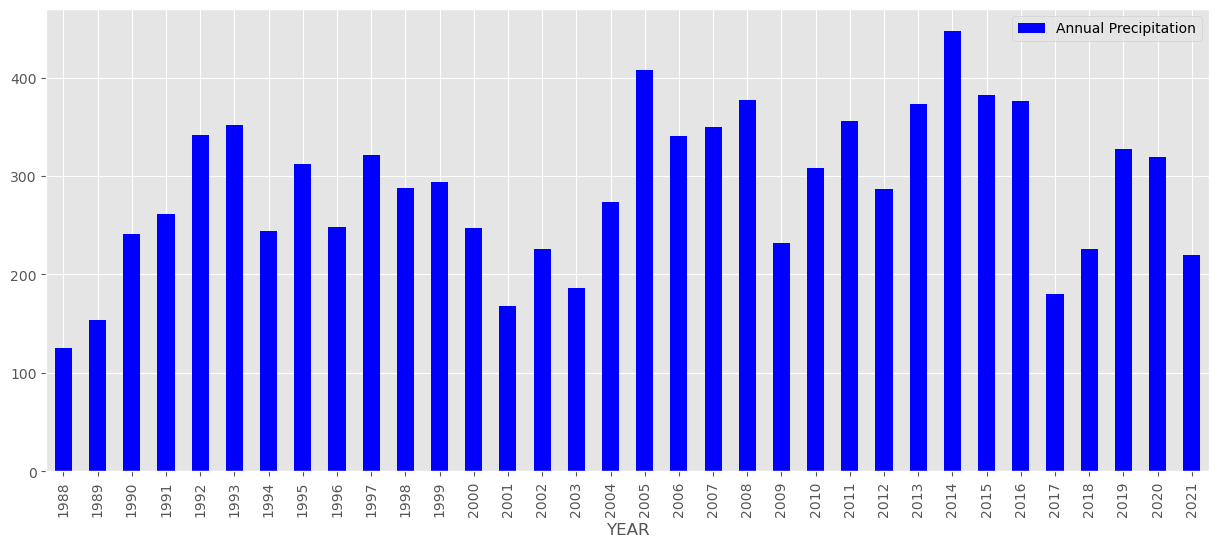

In [52]:
# Annual precipitation for all the data

annualData = finframe.mean(axis=1, skipna=True).groupby(level="YEAR").sum()
#display(annualData)
annualData.name = "Annual Precipitation"

fig = plt.figure()
annualData.plot(kind='bar', color='b', grid=True)
plt.legend( );
fig.set_size_inches(15,6)
plt.show()


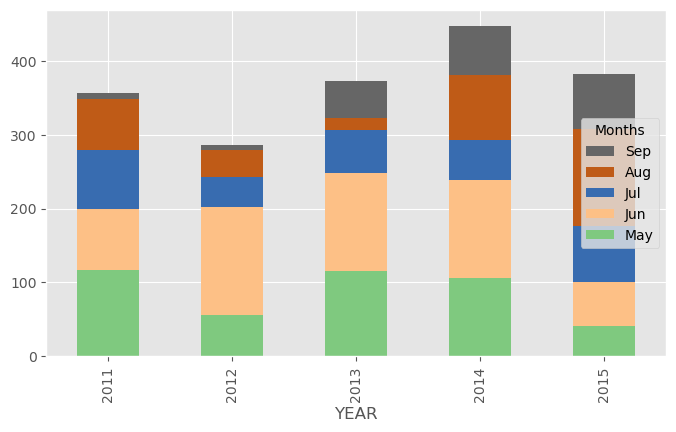

In [51]:
# Precipitation from 2011 to 2015 by month

compFrame = finframe.mean(axis=1, skipna=True).loc[2011:2015]
#display(compFrame)
#display(compFrame.unstack())
fig = plt.figure()
axis = fig.add_subplot(1,1,1)
compFrame.unstack().plot(kind='bar', stacked=True, ax=axis, colormap='Accent')
month_labels = ['May','Jun','Jul','Aug','Sep']
handles, labels = axis.get_legend_handles_labels()
#display(labels)
#display(handles)
axis.legend(reversed(handles), reversed(month_labels), title='Months', loc='center right')

fig.set_size_inches(16/2,9/2)
plt.show()

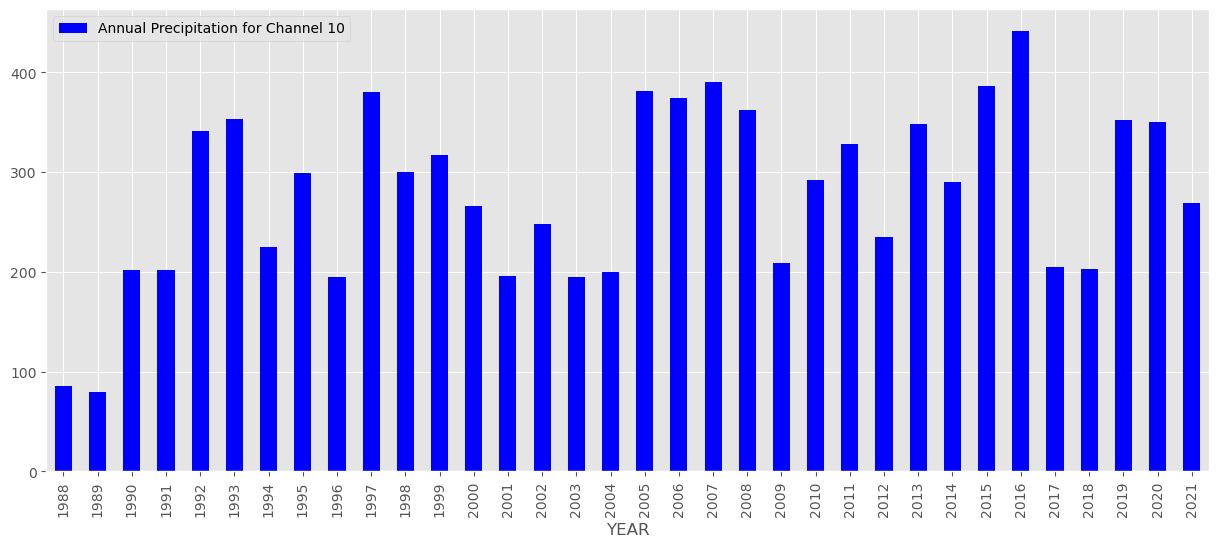

In [50]:
# Rainfall for a particular channel

channel = 10
annualByChannel = finframe.loc[:,('RAINFALL',channel)].unstack().sum(axis=1, skipna=True)
#display(annualByChannel)
annualByChannel.name = "Annual Precipitation for Channel " + str(channel)

fig = plt.figure()
annualByChannel.plot(kind='bar', color='b', grid=True)
plt.legend();
fig.set_size_inches(15,6)
plt.show()
